 **@author: Mano Joseph MATHEW**
**@student: ChengJingYun**
**@group: WUT_Nov2025**
**@email: mano.mathew@efrei.fr**
**Introduction**
The goals for this session are multiple: Use the Jupyter computing environment, that is a widely used tool to develop and share data analysis and data visualization workflows.
**Understanding the basic techniques**
- Loading CSV Uber Data file
- Data transformation
- Create Functions
- Use matplotlib, pandas, seaborn
- Use a simple plot for ploting Uber longitute and latitude data
**Load the data**
Download the data "uber-raw-data-apr14.csv"
Use pandas.read_csv to read the csv file
**Perform Data transformation**
- Use .pd.to_datetime for better date transformation
- Creating a function for finding the day of the month example: def get_dom(dt): return dt.day data['dom'] = data['Date/Time'].map(get_dom)
- Creating a function for finding the weekday and hours example: def get_weekday(dt): return dt.weekday() data['weekday']= data['Date/Time'].map(get_weekday)
- Analyse the day of month
**Visual representation**
- Use hist for creating histogram with bins = 30, rwidth=0.8, range=(0.5,30.5)
- Label the title as Frequency by DoM - Uber - April 2014, x-axis Date of the month and y-axis Frequency
- Creating a function for Grouping the data by date of month (dom) example: def count_rows(rows): return len(rows)
- Use plot, bar function to plot the data by date
- Sort the data by date and use bar function to plot the sorted data by date (.sort_values())
- Visualise the data by hours using histogram with bins=24,range=(0.5,24)
- Visualise the data by weekday using histogram with bins=7,range = (-.5,6.5), rwidth=0.8
- Check the use of xticks and add 'Mon Tue Wed Thu Fri Sat Sun'.split()
**Performing Cross Analysis**
- Group the data by weekday and hour using .apply(count_rows).unstack()
- Create heatmap using seaborn.heatmap for the grouped data
- Analyse both Latitude and Longitude data represent the specific ranges for each respectively
- Example Latitude range =(40.5,41) and likewise set for Longitude
- Merge the two histograms Latitude and Longitude using twiny()
- Plot the dots for both Latitude and Longitude set the figsize=(20, 20)
**“By visualizing information, we turn it into a landscape that you can explore with your eyes. A sort of information map. And when you’re lost in information, an information map is kind of useful.”**
 

In [1]:
! pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://pypi.tuna.tsinghua.edu.cn/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
path = "uber-raw-data-apr14.csv" #reading the csv file : Note that you have downloaded the csv file to the location

In [4]:
df = pd.read_csv(path, delimiter = ',') #Using delimiter for identifying the different columns

In [5]:
df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [7]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [9]:
def get_dom(dt):
    return dt.day

In [10]:
df['day'] = df['Date/Time'].map(get_dom)

In [11]:
df

,Date/Time,Lat,Lon,Base,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1
...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30


In [12]:
def get_weekday(dt):
    return dt.weekday()

In [13]:
df['weekday'] = df['Date/Time'].map(get_weekday)

In [14]:
df

,Date/Time,Lat,Lon,Base,day,weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1
...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2


In [15]:
def get_hour(dt):
    return dt.hour #.hour is an attribute

In [16]:
df['hour'] = df['Date/Time'].map(get_hour)

In [17]:
df

,Date/Time,Lat,Lon,Base,day,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23


In [18]:
df.describe()

,Date/Time,Lat,Lon,day,weekday,hour
count,564516,564516.000000,564516.000000,564516.000000,564516.00000,564516.000000
mean,2014-04-16 17:46:01.296261120,40.740005,-73.976817,16.117127,2.86698,14.465043
min,2014-04-01 00:00:00,40.072900,-74.773300,1.000000,0.00000,0.000000
25%,2014-04-08 16:27:00,40.722500,-73.997700,8.000000,1.00000,10.000000
50%,2014-04-16 19:19:00,40.742500,-73.984800,16.000000,3.00000,16.000000
75%,2014-04-24 22:14:00,40.760700,-73.970000,24.000000,4.00000,19.000000
max,2014-04-30 23:59:00,42.116600,-72.066600,30.000000,6.00000,23.000000
std,NaN,0.036083,0.050426,9.048139,1.82081,5.873925


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
 4   day        564516 non-null  int64         
 5   weekday    564516 non-null  int64         
 6   hour       564516 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 30.1+ MB


# Let us start Visual representation

# Create histogram to know the Frequency by Days of the month

Text(0.5, 0, 'Days of the month')

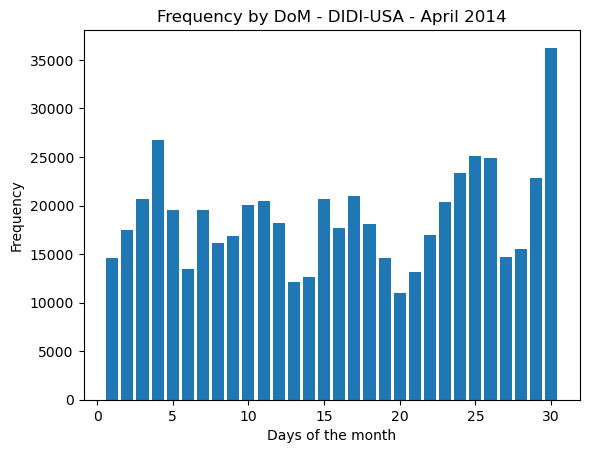

In [20]:
hist = df["day"].plot.hist(bins = 30, rwidth = 0.8, range=(0.5,30.5), title = "Frequency by DoM - DIDI-USA - April 2014")
plt.xlabel('Days of the month')
#binsint or sequence or str, default: rcParams["hist.bins"] (default: 10)
#If bins is an integer, it defines the number of equal-width bins in the range.
#If bins is a sequence, it defines the bin edges, including the left edge of the first bin
#and the right edge of the last bin; in this case, bins may be unequally spaced.

# Creating a function for Grouping the data by date of month (dom) example: def count_rows(rows): return len(rows)

In [21]:
def count_rows(rows):
    return len(rows)

In [22]:
by_date = df.groupby('day').apply(count_rows)
by_date

C:\Users\11597\AppData\Local\Temp\ipykernel_22088\1814074559.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_date = df.groupby('day').apply(count_rows)


day
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

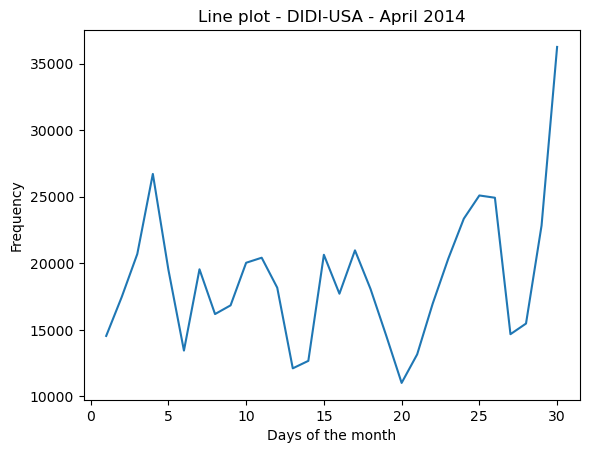

In [23]:
plt.title('Line plot - DIDI-USA - April 2014')
plt.xlabel('Days of the month')
plt.ylabel('Frequency')
plt.plot(by_date);

# Use the plot and bar functions to plot data by date Sort the data by date and use the bar function to plot the data sorted by date (.sort_values())

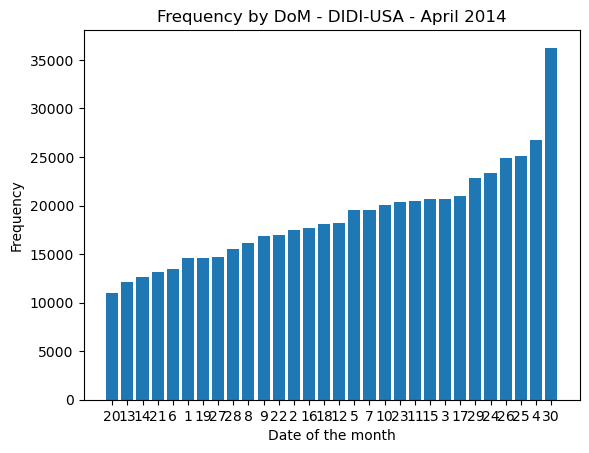

In [24]:
plt.bar(range(1, 31), by_date.sort_values())
plt.xticks(range(1, 31), by_date.sort_values().index)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by DoM - DIDI-USA - April 2014');

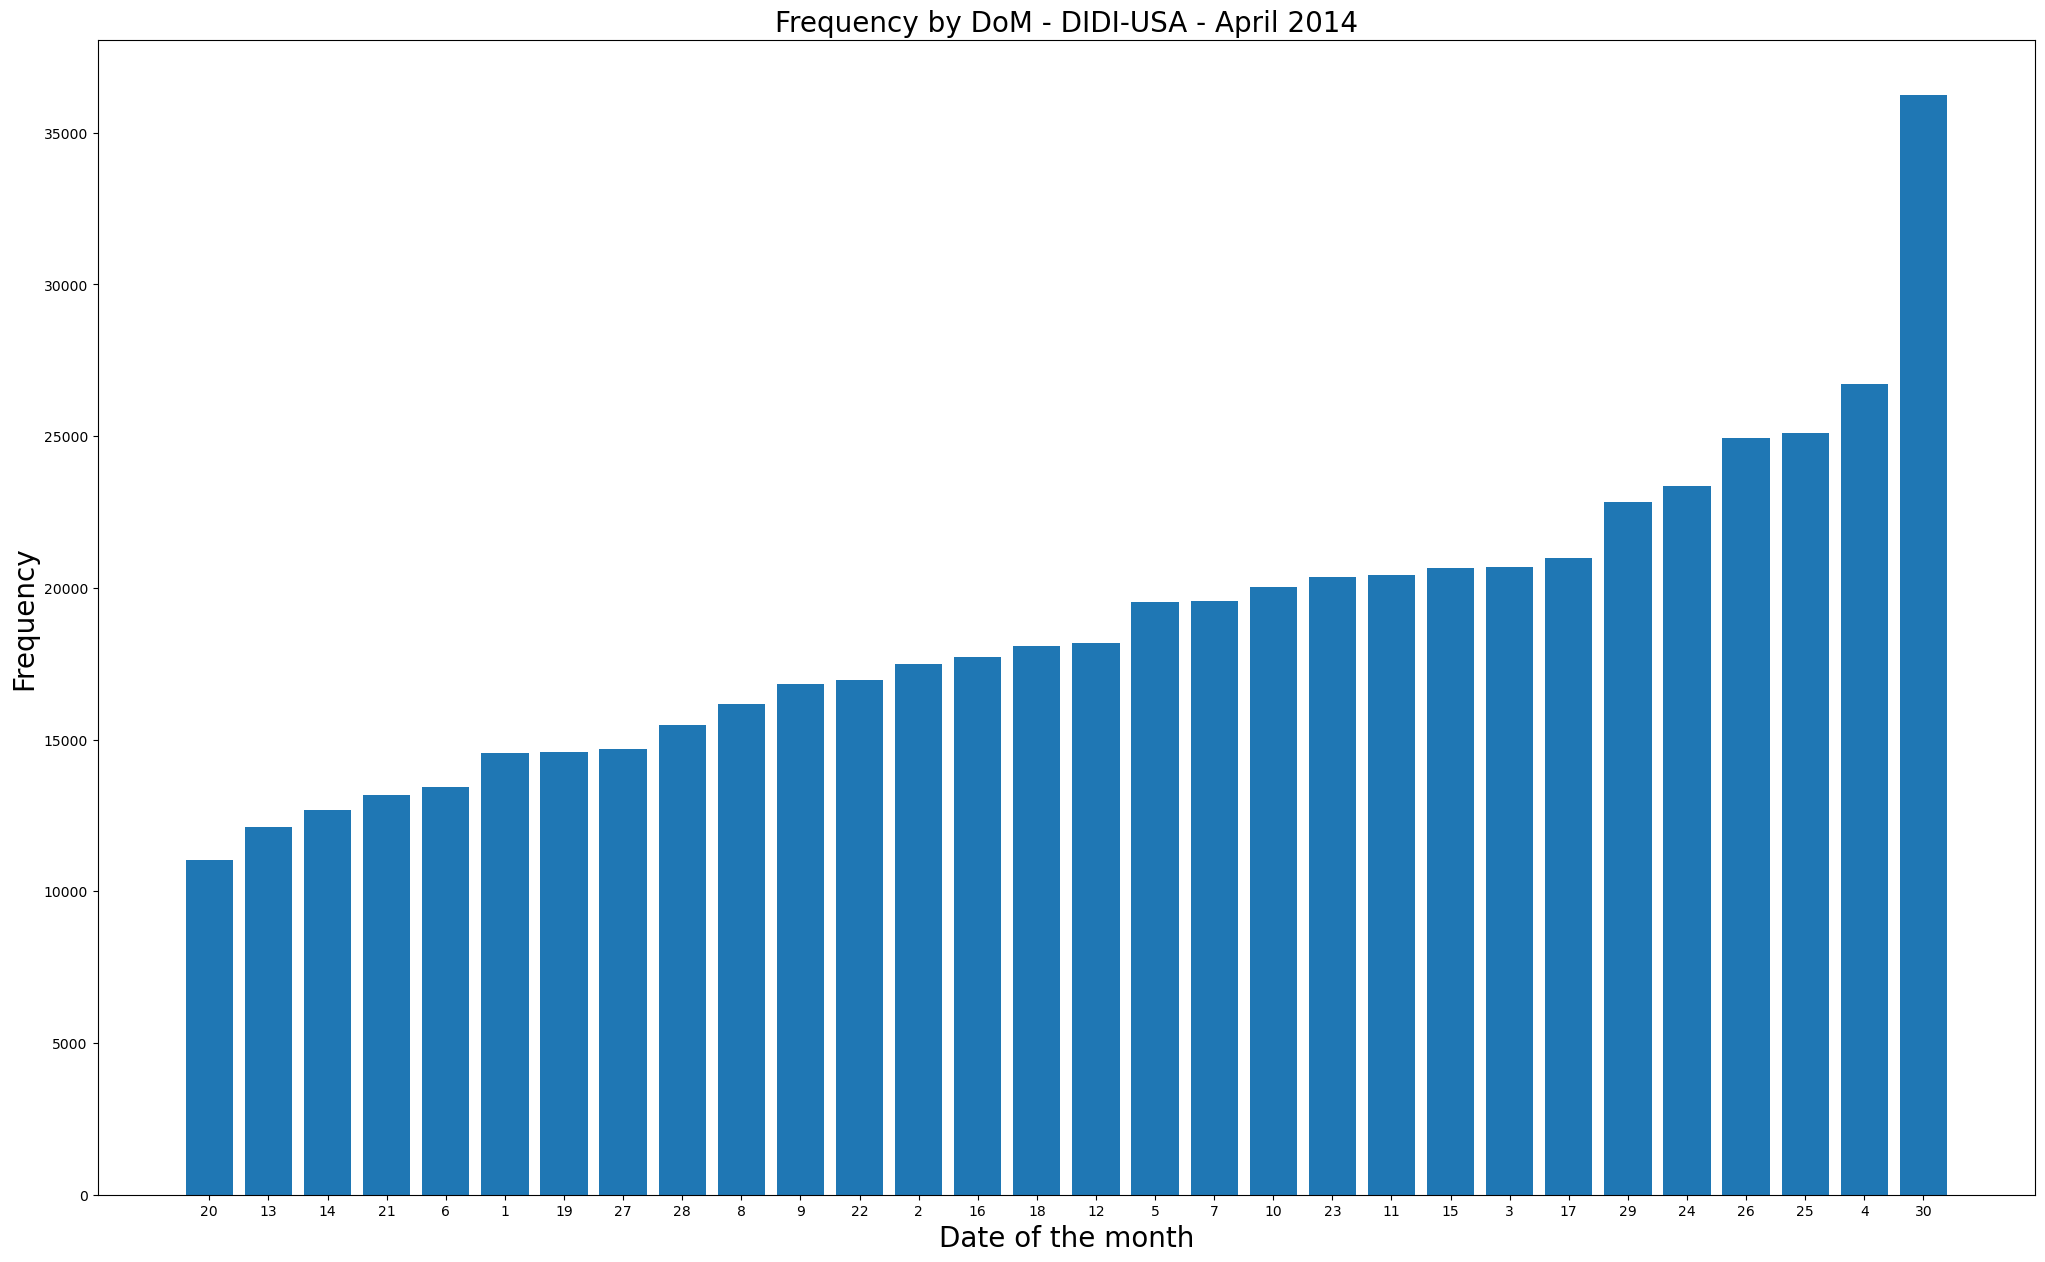

In [25]:
plt.figure(figsize = (25, 15))
plt.bar(range(1, 31), by_date.sort_values())
plt.xticks(range(1, 31), by_date.sort_values().index)
plt.xlabel(('Date of the month'), fontsize=20)
plt.ylabel(('Frequency'), fontsize=20)
plt.title(('Frequency by DoM - DIDI-USA - April 2014'), fontsize=20);

# Visualise data by hour using a histogram with bins=24, range=(0.5,24)

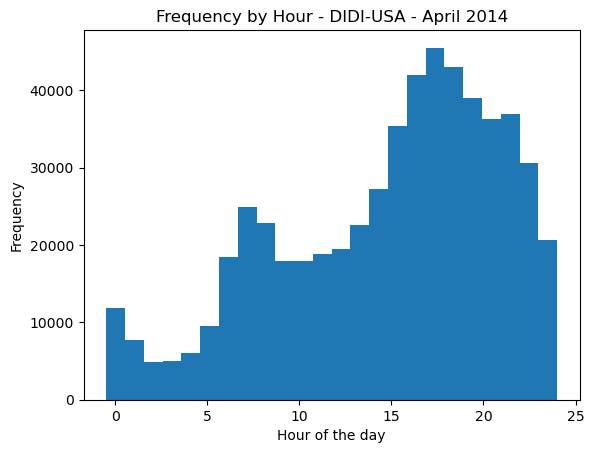

In [26]:
plt.hist(df.hour, bins = 24, range = (-0.5, 24))
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Frequency by Hour - DIDI-USA - April 2014');

# Visualise the data by weekday using histogram with bins=7,range = (-.5,6.5), rwidth=0.8

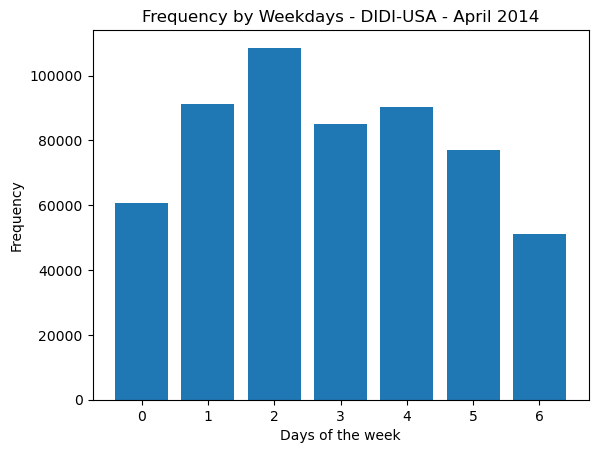

In [27]:
plt.hist(df.weekday, bins = 7, rwidth = 0.8, range = (-.5, 6.5))
plt.xlabel('Days of the week')
plt.ylabel('Frequency')
plt.title('Frequency by Weekdays - DIDI-USA - April 2014');

# Performing Cross Analysis
 
- Group the data by weekday and hour using .apply(count_rows).unstack()

In [28]:
df2 = df.groupby(['weekday', 'hour']).size().unstack()
df2.head()
#Pandas Unstack is a function that pivots the level of the indexed columns in a stacked dataframe. 
#A stacked dataframe is usually a result of an aggregated groupby function in pandas.
#Stack() sets the columns to a new level of hierarchy whereas Unstack() pivots the indexed column.

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393


# Create heatmap using seaborn.heatmap for the grouped data

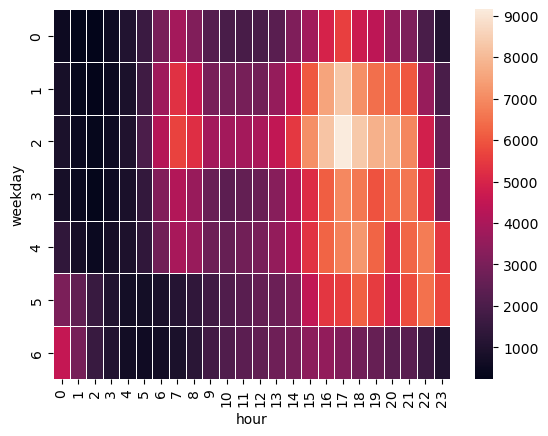

In [29]:
sns.heatmap(df2, linewidths = .5);

# Adding annotation to the weekdays for better understanding

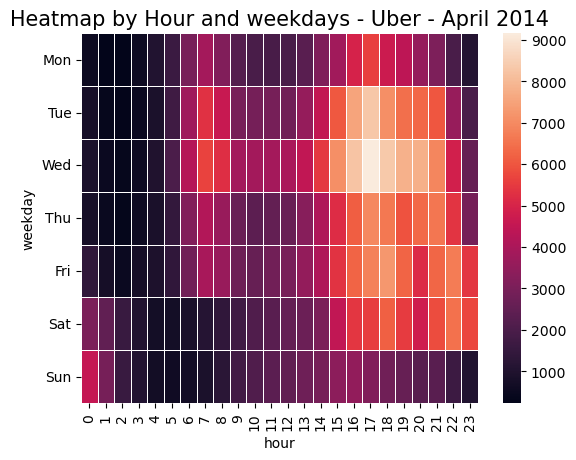

In [30]:
heatmap = sns.heatmap(df2, linewidths = .5);
#Annoted heatmap
plt.title('Heatmap by Hour and weekdays - Uber - April 2014',fontsize=15)
heatmap.set_yticklabels(('Mon Tue Wed Thu Fri Sat Sun').split(), rotation='horizontal');

# Analyse both Latitude and Longitude data represent the specific ranges for each respectively

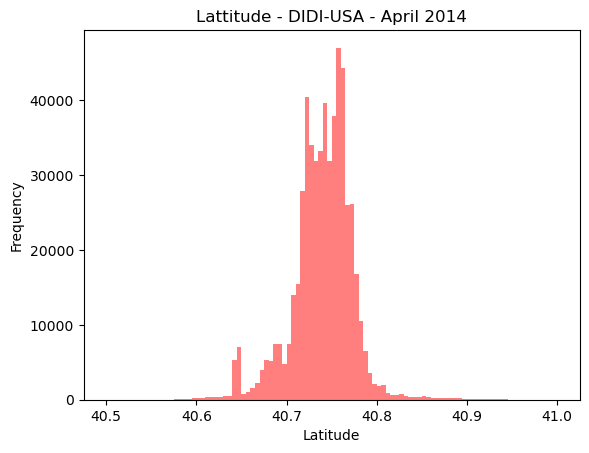

In [31]:
#Lat :
plt.hist(df['Lat'], bins = 100, range = (40.5, 41), color = 'r',alpha = 0.5, label = 'Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Lattitude - DIDI-USA - April 2014');
plt.show()

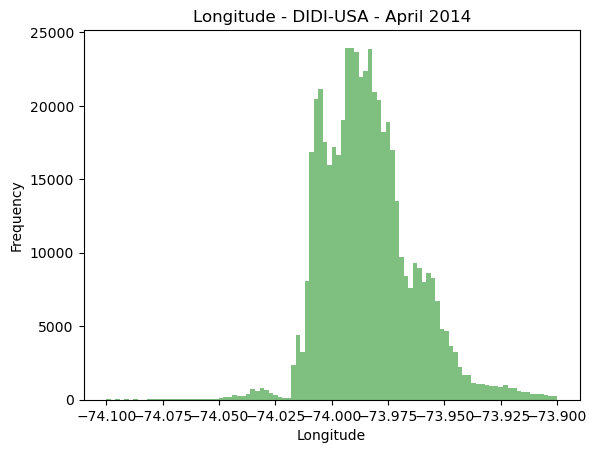

In [32]:
#Lon :
plt.hist(df['Lon'], bins = 100, range = (-74.1, -73.9), color = 'g', alpha = 0.5, label = 'Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Longitude - DIDI-USA - April 2014');
plt.show()

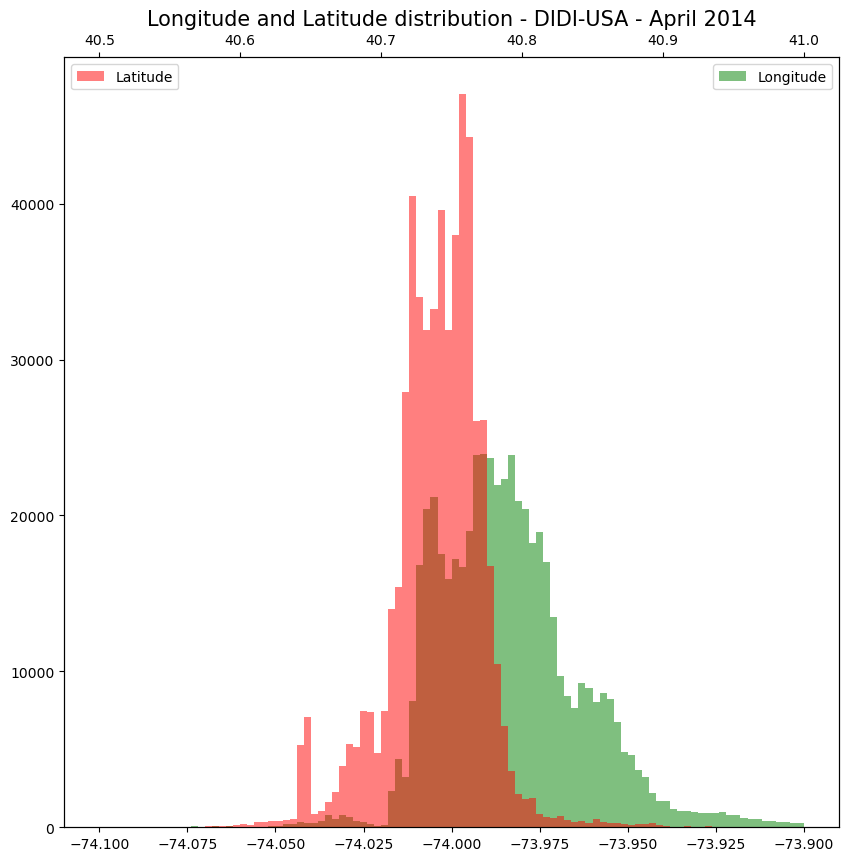

In [33]:
# Let's use the twiny() function to overlay the two images with an opacity of 0.5
plt.figure(figsize=(10, 10), dpi=100)
plt.title('Longitude and Latitude distribution - DIDI-USA - April 2014',fontsize=15)
plt.hist(df['Lon'], bins = 100, range = (-74.1, -73.9), color = 'g', alpha = 0.5, label = 'Longitude')
plt.legend(loc = 'best')
plt.twiny()
plt.hist(df['Lat'], bins = 100, range = (40.5, 41), color = 'r',alpha = 0.5, label = 'Latitude')
plt.legend(loc = 'upper left')
plt.show()

''

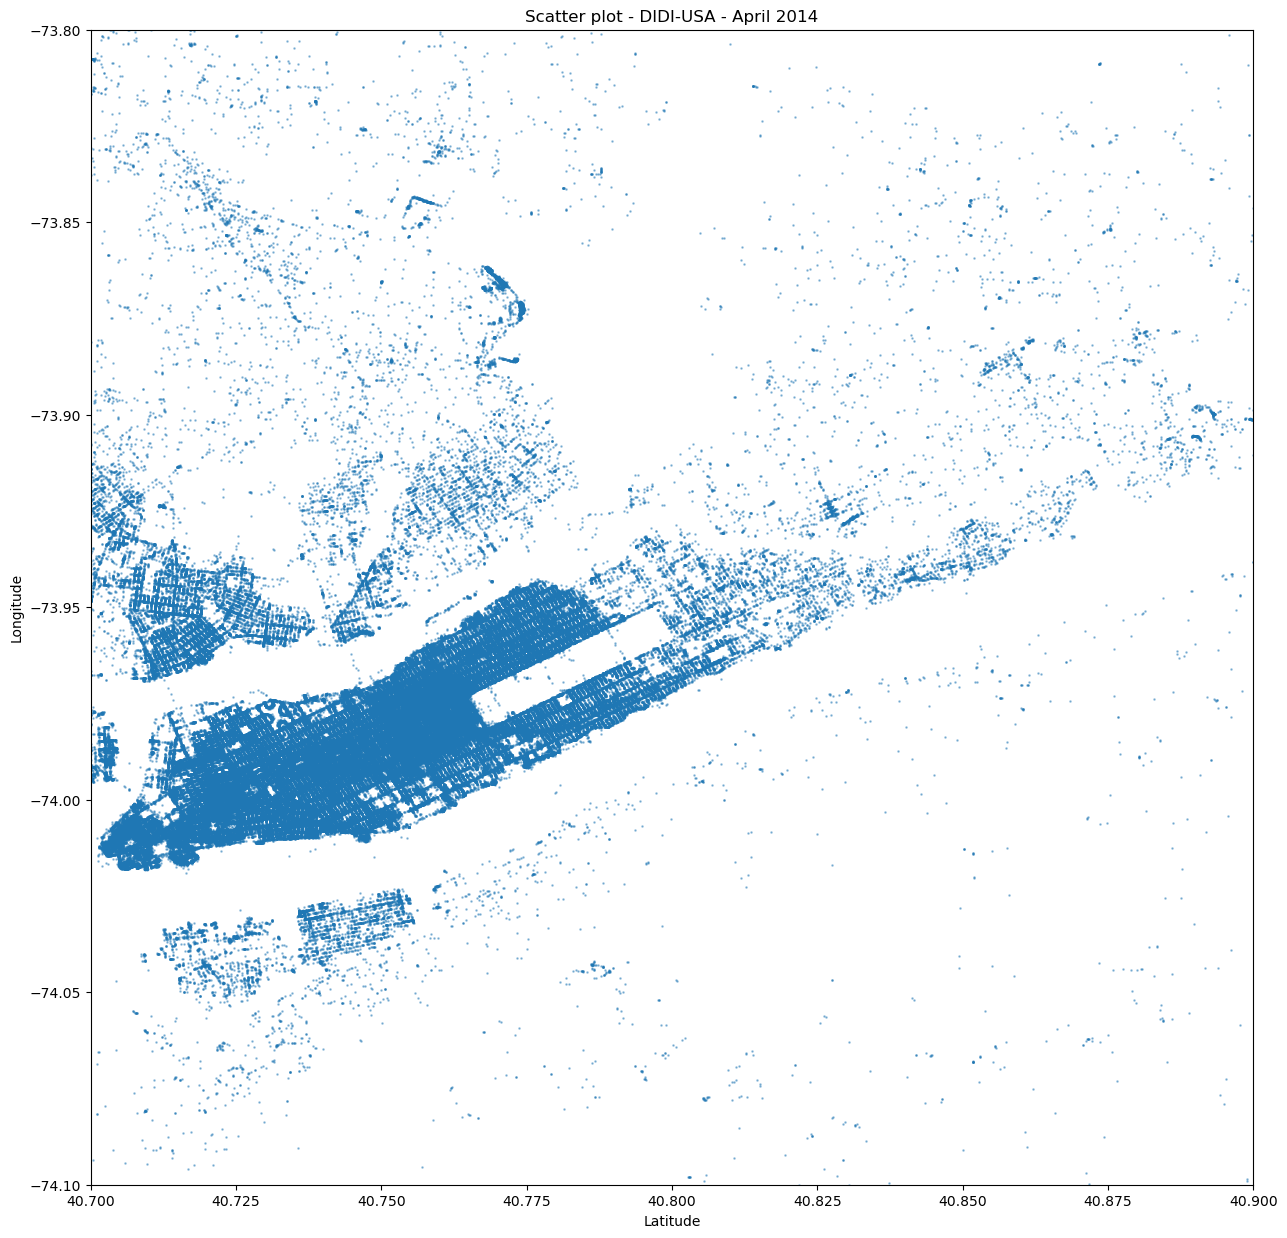

In [34]:
plt.figure(figsize=(15, 15), dpi=100)
plt.title('Scatter plot - DIDI-USA - April 2014')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(df['Lat'],df['Lon'],s=0.8,alpha=0.4) #Without list also shows the same plot
plt.ylim(-74.1, -73.8)
plt.xlim(40.7, 40.9)
;

# Dataset2 to be done by students
 
Explore with the second dataset and try to explore in the similar fashion or try other libraries accordingly to your interest

In [35]:
import pandas as pd
# path2 = "https://raw.githubusercontent.com/uber-web/kepler.gl-data/master/nyctrips/data.csv"
path2 = "d2.csv"
d2 = pd.read_csv(path2, delimiter = ',')

In [36]:
d2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
0,2,2015-01-15 19:05:39 +00:00,2015-01-15 19:23:42 +00:00,1,1.59,-73.993896,40.750111,-73.974785,40.750618,12.0,3.25,17.05
1,2,2015-01-15 19:05:39 +00:00,2015-01-15 19:32:00 +00:00,1,2.38,-73.976425,40.739811,-73.983978,40.757889,16.5,4.38,22.68
2,2,2015-01-15 19:05:40 +00:00,2015-01-15 19:21:00 +00:00,5,2.83,-73.968704,40.754246,-73.955124,40.786858,12.5,0.00,14.30
3,2,2015-01-15 19:05:40 +00:00,2015-01-15 19:28:18 +00:00,5,8.33,-73.863060,40.769581,-73.952713,40.785782,26.0,8.08,41.21
4,2,2015-01-15 19:05:41 +00:00,2015-01-15 19:20:36 +00:00,1,2.37,-73.945541,40.779423,-73.980850,40.786083,11.5,0.00,13.30
...,...,...,...,...,...,...,...,...,...,...,...,...
97981,1,2015-01-15 06:04:36 +00:00,2015-01-15 06:09:13 +00:00,1,1.00,-73.973167,40.744244,-73.975433,40.752487,5.5,1.26,7.56
97982,1,2015-01-15 06:04:36 +00:00,2015-01-15 06:43:36 +00:00,1,16.70,-73.965134,40.759991,-73.782372,40.644108,52.0,13.20,66.00
97983,1,2015-01-15 06:04:36 +00:00,2015-01-15 06:17:32 +00:00,1,4.50,-74.015182,40.715755,-73.981285,40.765930,15.5,1.00,17.30
97984,1,2015-01-15 06:04:37 +00:00,2015-01-15 06:09:38 +00:00,1,0.80,-73.971794,40.754051,-73.982391,40.759842,5.5,1.00,7.30


In [37]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97986 entries, 0 to 97985
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               97986 non-null  int64  
 1   tpep_pickup_datetime   97986 non-null  object 
 2   tpep_dropoff_datetime  97986 non-null  object 
 3   passenger_count        97986 non-null  int64  
 4   trip_distance          97986 non-null  float64
 5   pickup_longitude       97986 non-null  float64
 6   pickup_latitude        97986 non-null  float64
 7   dropoff_longitude      97986 non-null  float64
 8   dropoff_latitude       97986 non-null  float64
 9   fare_amount            97986 non-null  float64
 10  tip_amount             97986 non-null  float64
 11  total_amount           97986 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 9.0+ MB


In [38]:
d2['tpep_pickup_datetime'] = pd.to_datetime(d2['tpep_pickup_datetime'])
d2['tpep_dropoff_datetime'] = pd.to_datetime(d2['tpep_dropoff_datetime'])

# Check missing value

<Axes: >

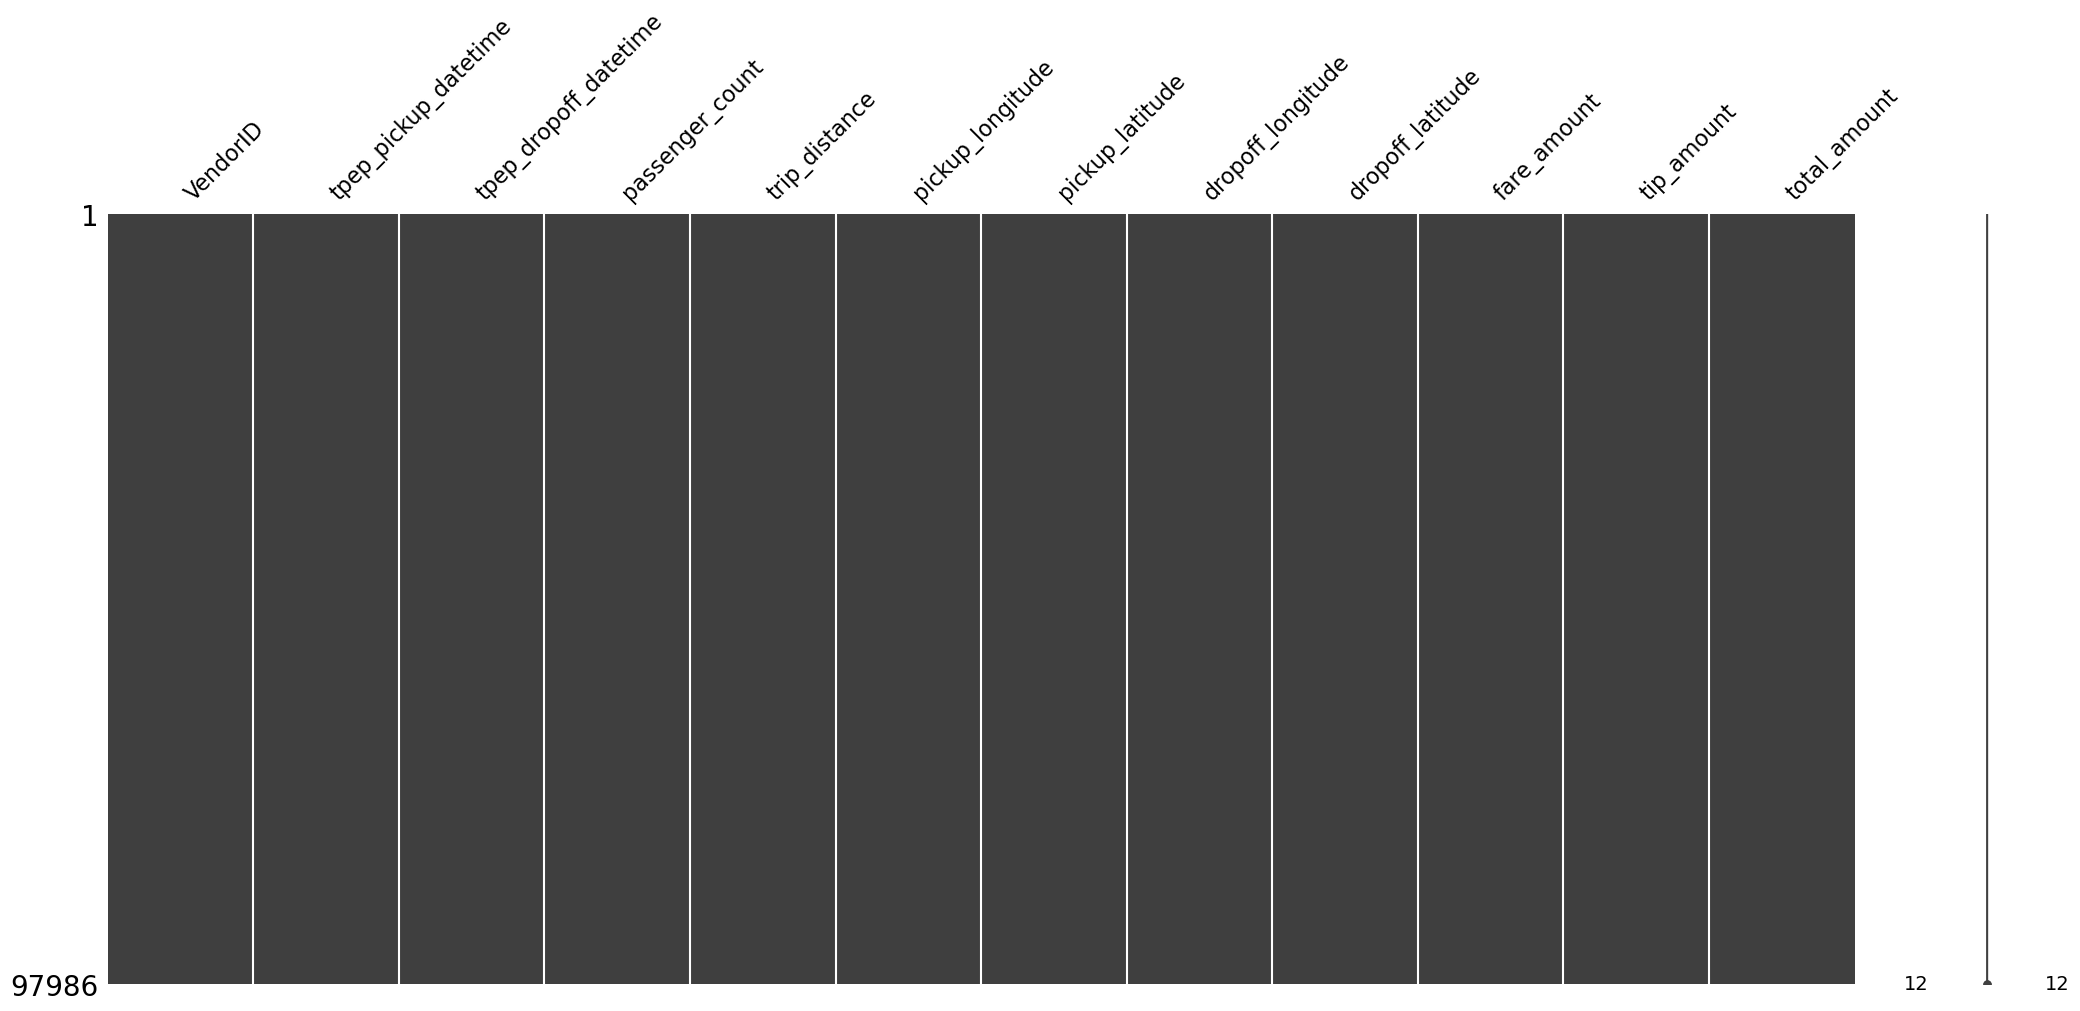

In [39]:
import missingno as msno
%matplotlib inline
msno.matrix(d2.sample(97986))

In [40]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97986 entries, 0 to 97985
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   VendorID               97986 non-null  int64              
 1   tpep_pickup_datetime   97986 non-null  datetime64[ns, UTC]
 2   tpep_dropoff_datetime  97986 non-null  datetime64[ns, UTC]
 3   passenger_count        97986 non-null  int64              
 4   trip_distance          97986 non-null  float64            
 5   pickup_longitude       97986 non-null  float64            
 6   pickup_latitude        97986 non-null  float64            
 7   dropoff_longitude      97986 non-null  float64            
 8   dropoff_latitude       97986 non-null  float64            
 9   fare_amount            97986 non-null  float64            
 10  tip_amount             97986 non-null  float64            
 11  total_amount           97986 non-null  float64        

# Extract pickup hour feature from tpep_pickup_datetime column

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def get_hour(dt):
    return dt.hour
d2['pickup_hour'] = d2['tpep_pickup_datetime'].map(get_hour)
d2[['tpep_pickup_datetime', 'pickup_hour']].head()

,tpep_pickup_datetime,pickup_hour
0,2015-01-15 19:05:39+00:00,19
1,2015-01-15 19:05:39+00:00,19
2,2015-01-15 19:05:40+00:00,19
3,2015-01-15 19:05:40+00:00,19
4,2015-01-15 19:05:41+00:00,19


# Visualise order distribution by pickup hour using histogram (bins=24)

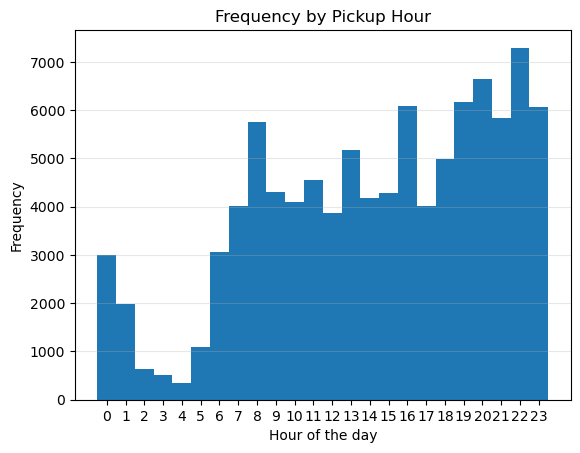

In [42]:
plt.hist(d2['pickup_hour'], bins=24, range=(-0.5, 23.5), color='#1f77b4')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Frequency by Pickup Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

# Visualise passenger count distribution using bar chart

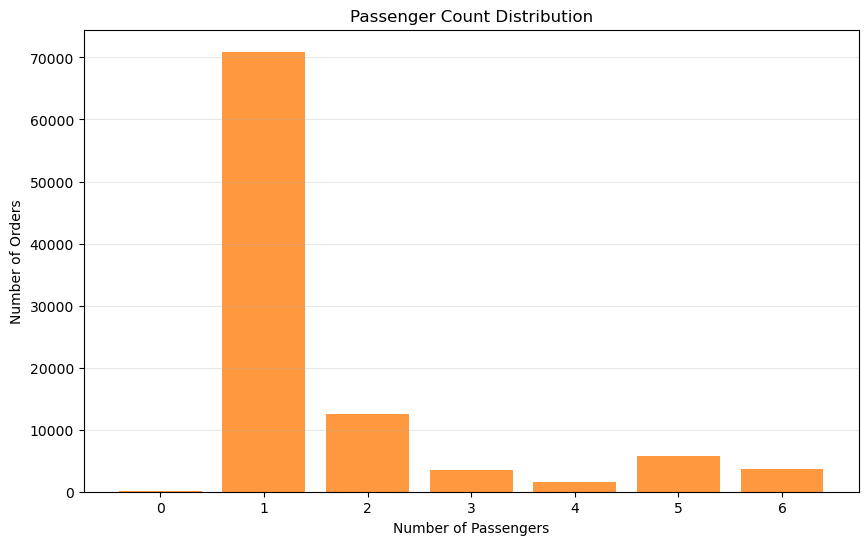

Passenger count statistics:
passenger_count
0       45
1    70925
2    12564
3     3466
4     1515
5     5735
6     3736
Name: count, dtype: int64


In [43]:
passenger_counts = d2['passenger_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(passenger_counts.index, passenger_counts.values, color='#ff7f0e', alpha=0.8)
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Orders')
plt.title('Passenger Count Distribution')
plt.xticks(passenger_counts.index)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Passenger count statistics:")
print(passenger_counts)

# Visualise trip distance distribution using histogram (filter outliers)

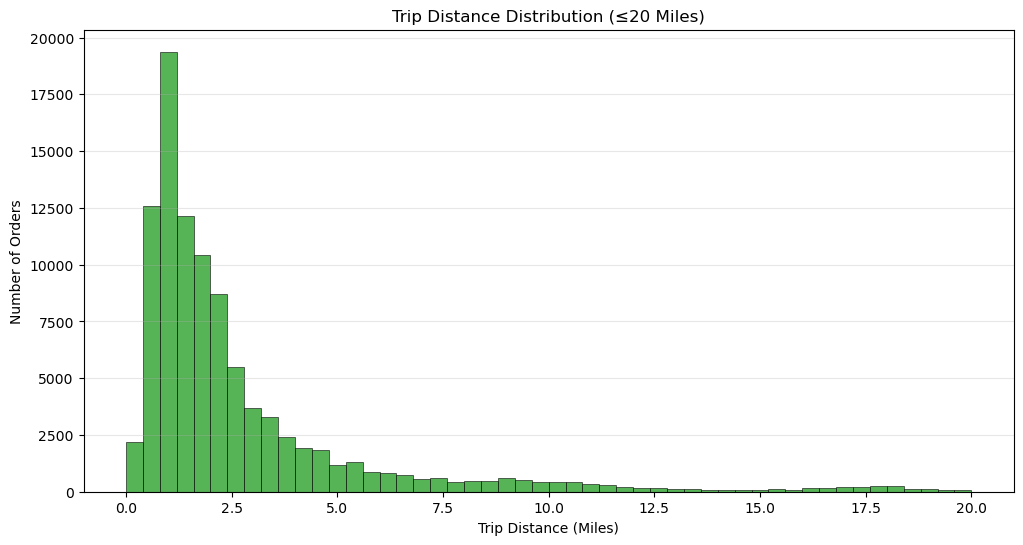

Trip Distance Statistics (≤20 Miles):
count    97589.000000
mean         2.761111
std          3.181604
min          0.000000
25%          1.000000
50%          1.660000
75%          3.010000
max         20.000000
Name: trip_distance, dtype: float64


In [44]:
filtered_distance = d2[d2['trip_distance'] <= 20]['trip_distance']

plt.figure(figsize=(12, 6))
plt.hist(filtered_distance, bins=50, color='#2ca02c', alpha=0.8, edgecolor='black', linewidth=0.5)
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Number of Orders')
plt.title('Trip Distance Distribution (≤20 Miles)')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Trip Distance Statistics (≤20 Miles):")
print(filtered_distance.describe())

# Visualise pickup location distribution using scatter plot

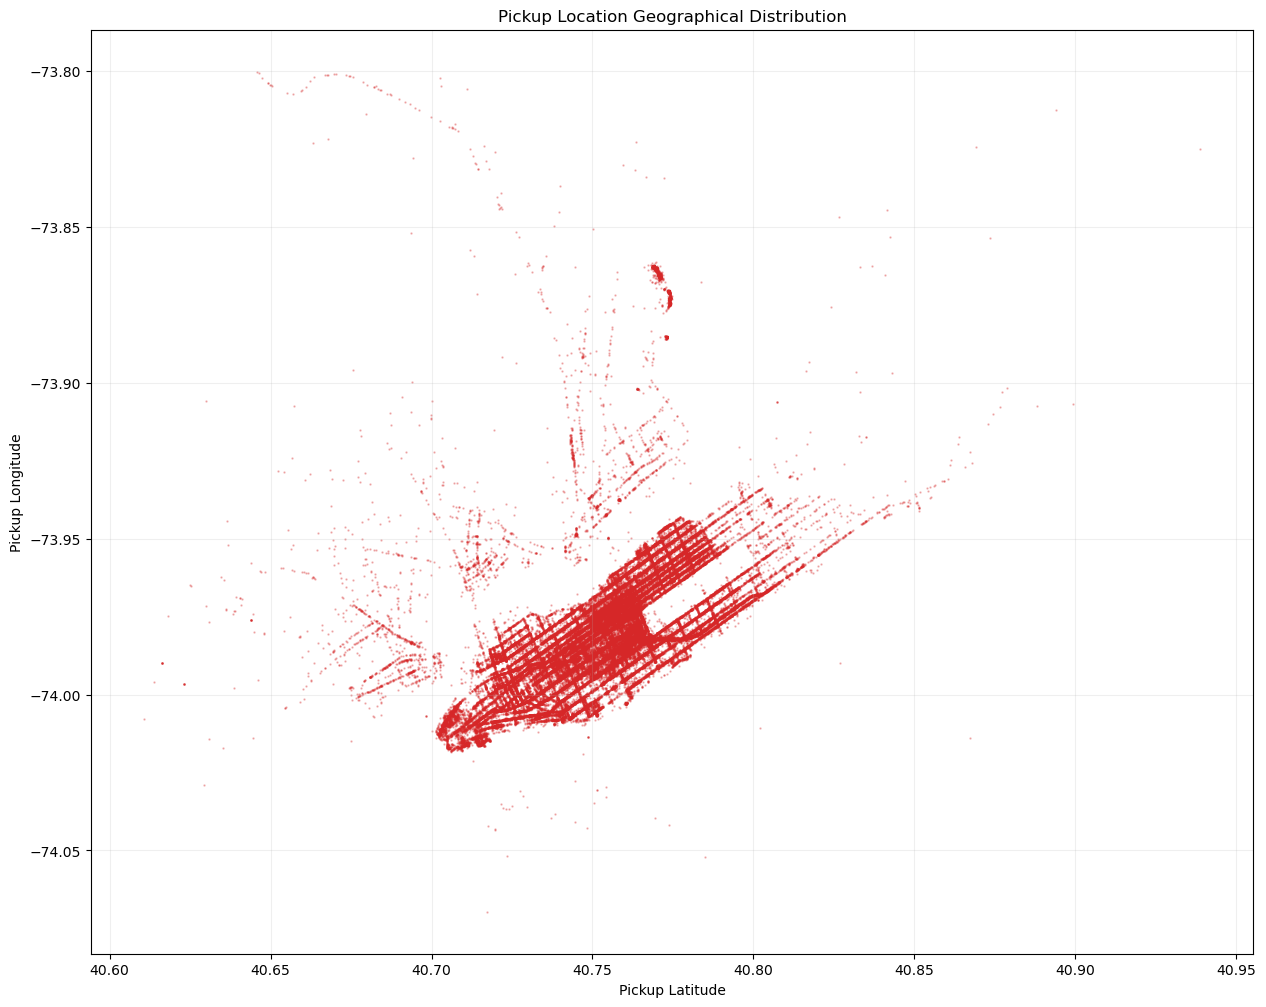

In [45]:
# Filter abnormal coordinates to focus on main service area
lat_filter = (d2['pickup_latitude'] >= 40.6) & (d2['pickup_latitude'] <= 40.95)
lon_filter = (d2['pickup_longitude'] >= -74.15) & (d2['pickup_longitude'] <= -73.8)
filtered_loc = d2[lat_filter & lon_filter]

plt.figure(figsize=(15, 12), dpi=100)
plt.scatter(filtered_loc['pickup_latitude'], filtered_loc['pickup_longitude'], s=0.5, alpha=0.3, color='#d62728')
plt.xlabel('Pickup Latitude')
plt.ylabel('Pickup Longitude')
plt.title('Pickup Location Geographical Distribution')
plt.grid(alpha=0.2)
plt.show()

# Visualise dropoff location distribution using scatter plot

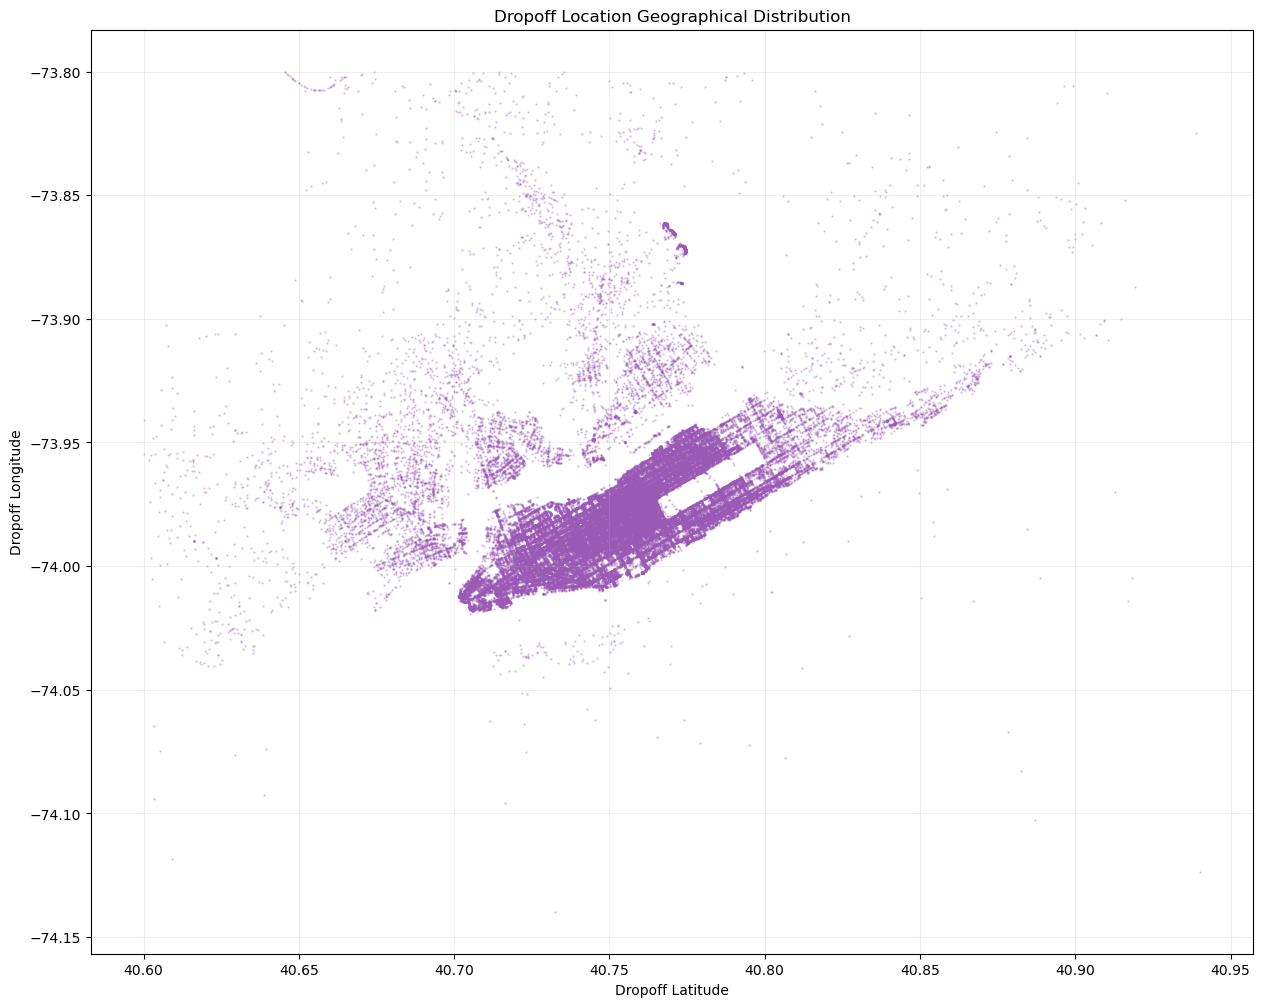

In [46]:
lat_filter = (d2['dropoff_latitude'] >= 40.6) & (d2['dropoff_latitude'] <= 40.95)
lon_filter = (d2['dropoff_longitude'] >= -74.15) & (d2['dropoff_longitude'] <= -73.8)
filtered_dropoff = d2[lat_filter & lon_filter]

plt.figure(figsize=(15, 12), dpi=100)
plt.scatter(filtered_dropoff['dropoff_latitude'], filtered_dropoff['dropoff_longitude'], s=0.5, alpha=0.3, color='#9b59b6')
plt.xlabel('Dropoff Latitude')
plt.ylabel('Dropoff Longitude')
plt.title('Dropoff Location Geographical Distribution')
plt.grid(alpha=0.2)
plt.show()

# Visualise total amount distribution using histogram (filter outliers)

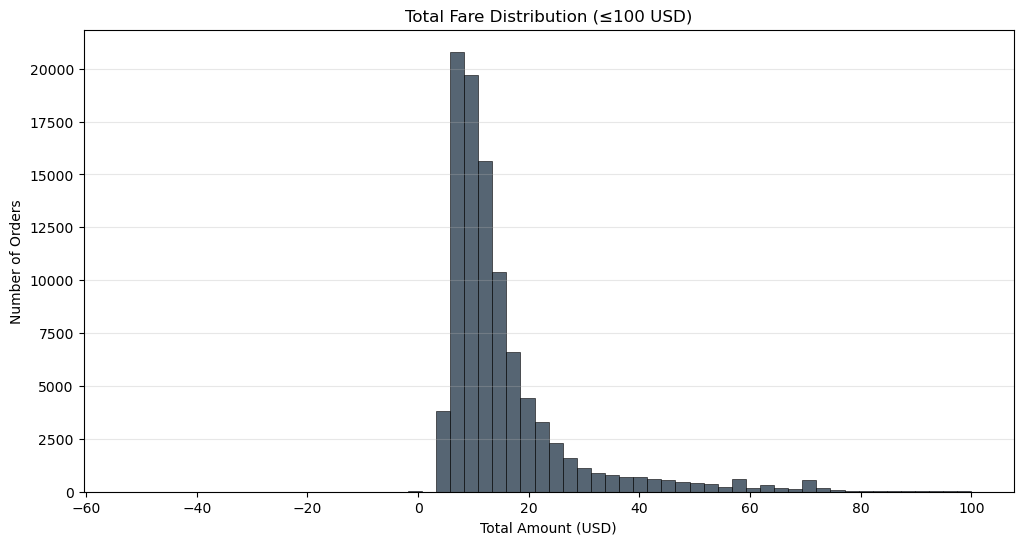

Total Fare Statistics (≤100 USD):
count    97890.000000
mean        15.375173
std         12.016513
min        -52.800000
25%          8.300000
50%         11.600000
75%         17.050000
max        100.000000
Name: total_amount, dtype: float64


In [47]:
# Filter abnormal high values to focus on mainstream fare range
filtered_total = d2[d2['total_amount'] <= 100]['total_amount']

plt.figure(figsize=(12, 6))
plt.hist(filtered_total, bins=60, color='#2c3e50', alpha=0.8, edgecolor='black', linewidth=0.5)
plt.xlabel('Total Amount (USD)')
plt.ylabel('Number of Orders')
plt.title('Total Fare Distribution (≤100 USD)')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Total Fare Statistics (≤100 USD):")
print(filtered_total.describe())

# Visualise tip amount distribution using histogram (filter outliers)

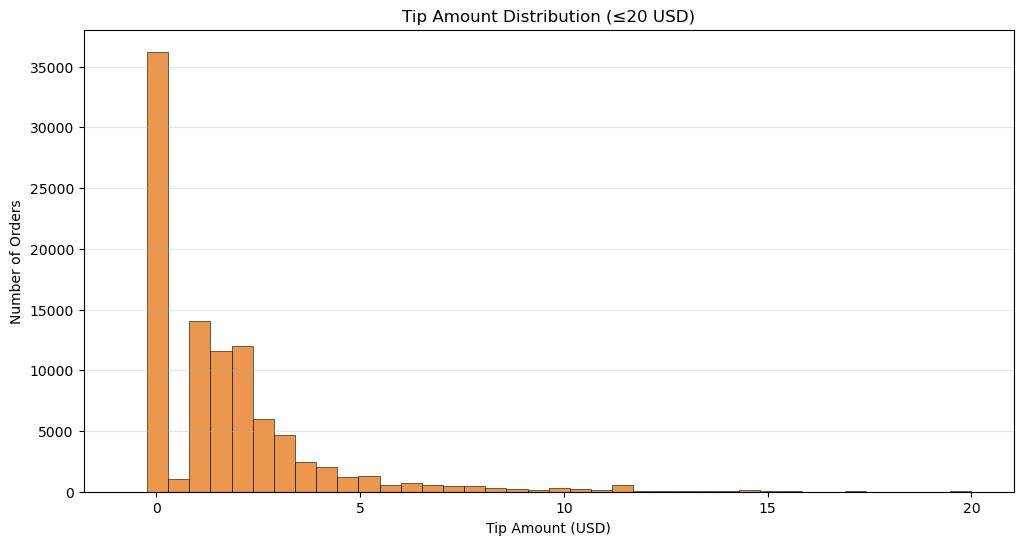

Tip Amount Statistics (≤20 USD):
count    97937.000000
mean         1.688842
std          2.223814
min         -0.750000
25%          0.000000
50%          1.200000
75%          2.250000
max         20.000000
Name: tip_amount, dtype: float64


In [48]:
# Focus on mainstream tip range by filtering extreme values
filtered_tip = d2[d2['tip_amount'] <= 20]['tip_amount']

plt.figure(figsize=(12, 6))
plt.hist(filtered_tip, bins=40, color='#e67e22', alpha=0.8, edgecolor='black', linewidth=0.5)
plt.xlabel('Tip Amount (USD)')
plt.ylabel('Number of Orders')
plt.title('Tip Amount Distribution (≤20 USD)')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Tip Amount Statistics (≤20 USD):")
print(filtered_tip.describe())

# Analyze correlation between pickup hour and tip amount using boxplot

C:\Users\11597\AppData\Local\Temp\ipykernel_22088\4265805234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pickup_hour', y='tip_amount', data=filtered_data, palette='viridis', width=0.7)


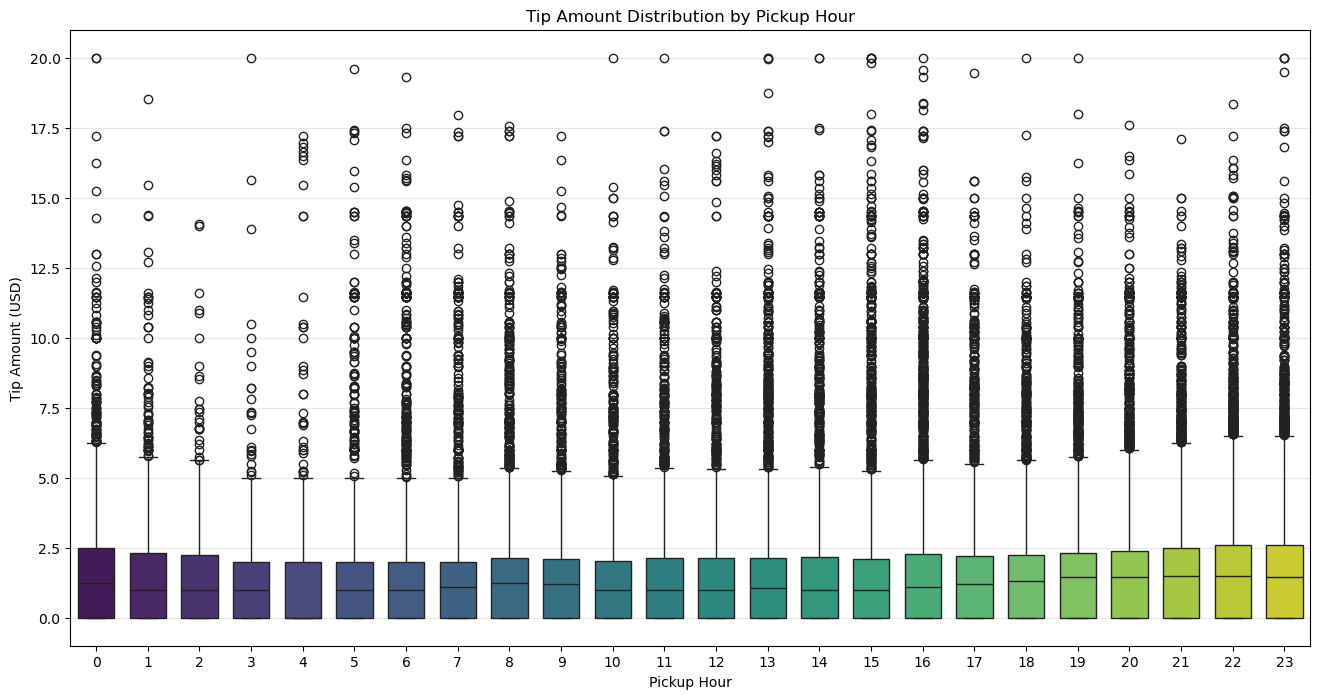

In [49]:
# Filter valid tip data and focus on hours with sufficient orders
filtered_data = d2[(d2['tip_amount'] <= 20) & (d2['tip_amount'] >= 0)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='pickup_hour', y='tip_amount', data=filtered_data, palette='viridis', width=0.7)
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Amount (USD)')
plt.title('Tip Amount Distribution by Pickup Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

# Analyze correlation between trip distance and total amount using scatter plot

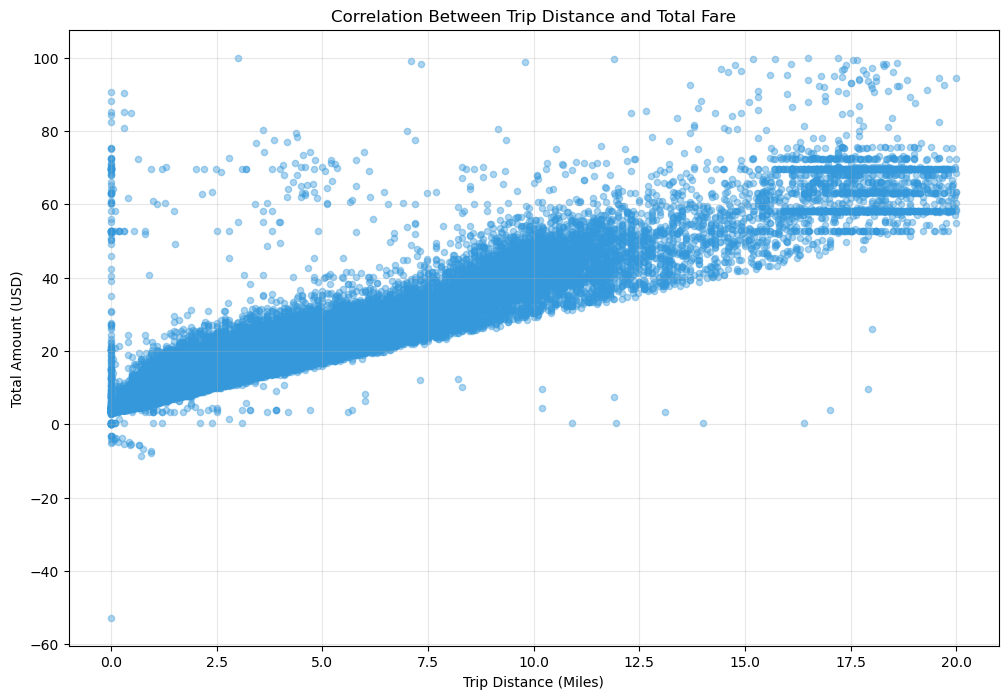

In [50]:
# Filter outliers to highlight the main correlation trend
filtered_corr = d2[(d2['trip_distance'] <= 20) & (d2['total_amount'] <= 100)]

plt.figure(figsize=(12, 8))
plt.scatter(filtered_corr['trip_distance'], filtered_corr['total_amount'], alpha=0.4, color='#3498db', s=20)
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Total Amount (USD)')
plt.title('Correlation Between Trip Distance and Total Fare')
plt.grid(alpha=0.3)
plt.show()